In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [72]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [73]:
df['target'] = iris.target
df.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [74]:
df0 = df[df['target']==0]
df1 = df[df['target']==1]
df2 = df[df['target']==2]

print(df0.head())
print(df1.head())
print(df2.head())

   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...               0.2       0
3                4.6               3.1  ...               0.2       0
4                5.0               3.6  ...               0.2       0

[5 rows x 5 columns]
    sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
50                7.0               3.2  ...               1.4       1
51                6.4               3.2  ...               1.5       1
52                6.9               3.1  ...               1.5       1
53                5.5               2.3  ...               1.3       1
54                6.5               2.8  ...               1.5       1

[5 rows x 5 columns]
     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
100                6.3               3

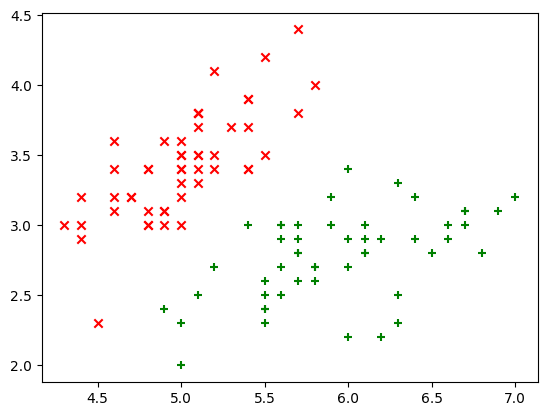

In [75]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'red', marker = 'x')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color = 'green', marker= '+')
# plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'], color = 'blue')

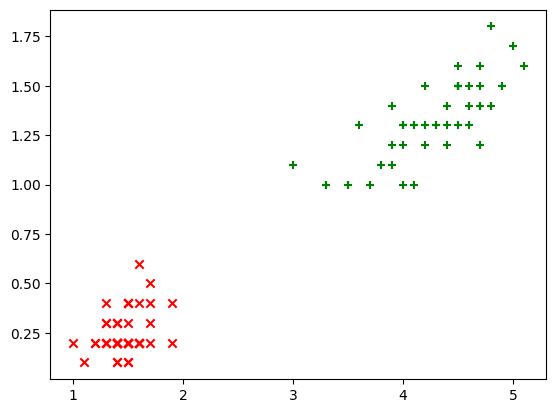

In [76]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'red',marker = 'x')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'], color = 'green',marker = '+')

In [77]:
X_train,X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size= 0.2)

In [78]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
model.score(X_test,y_test)

0.9666666666666667

In [80]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 11,  1],
       [ 0,  0,  8]], dtype=int64)

<AxesSubplot:>

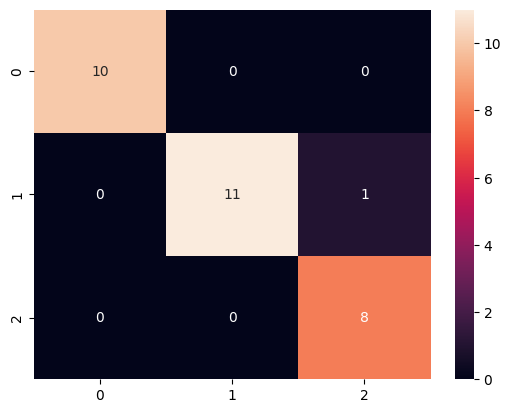

In [81]:
import seaborn as sns
sns.heatmap(cm,annot=True)


In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

